In [ ]:
%pip install opencv-python matplotlib

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("C:/Users/Administrator/Documents/GitHub/cnn-edge-detection/lena256.jpg", cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Ảnh không tồn tại hoặc đường dẫn không chính xác")
else:
    print("Ảnh tồn tại")


Ảnh tồn tại


In [34]:
# Đọc ảnh và chuyển sang ảnh grayscale
image = cv2.imread('C:/Users/Administrator/Documents/GitHub/cnn-edge-detection/lena256.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
# Sử dụng Canny để phát hiện viền và tạo nhãn (label)
edgesCanny = cv2.Canny(image, threshold1=100, threshold2=200)
edgesCannyTest = cv2.Canny(image, threshold1=150, threshold2=200)

# Hiển thị ảnh gốc và viền
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.title('Ảnh gốc')
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Canny 100/200')
plt.imshow(edgesCanny, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Canny 150/200')
plt.imshow(edgesCannyTest, cmap='gray')
plt.show()


In [3]:
from keras import layers, models

def build_unet_model():
    inputs = layers.Input(shape=(None, None, 1))
    
    # Encoder path
    # Block 1
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    bn1 = layers.BatchNormalization()(conv1)
    pool1 = layers.MaxPooling2D((2, 2))(bn1)
    
    # Block 2
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    bn2 = layers.BatchNormalization()(conv2)
    pool2 = layers.MaxPooling2D((2, 2))(bn2)
    
    # Block 3 - Bridge
    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    bn3 = layers.BatchNormalization()(conv3)
    
    # Decoder path với skip connections
    # Block 4
    up1 = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(bn3)
    bn4 = layers.BatchNormalization()(up1)
    concat1 = layers.Concatenate()([bn4, bn2])  # Skip connection với block 2
    conv4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(concat1)
    bn5 = layers.BatchNormalization()(conv4)
    
    # Block 5
    up2 = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same')(bn5)
    bn6 = layers.BatchNormalization()(up2)
    concat2 = layers.Concatenate()([bn6, bn1])  # Skip connection với block 1
    conv5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(concat2)
    bn7 = layers.BatchNormalization()(conv5)
    
    # Output layer
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(bn7)
    
    # Tạo model
    model = models.Model(inputs=inputs, outputs=outputs)
    
    # Compile model
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
    return model

# Khởi tạo model
model = build_unet_model()

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 1)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   320         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   128        ['conv2d[0][0]']                 
 alization)                     32)                                                           

In [2]:
from keras import models

model = models.load_model('./models/278k-5000-epochs10-batchsize32.hdf5')

In [4]:
import os

# Đường dẫn đến thư mục chứa ảnh
image_dir = 'C:/Users/Administrator/Documents/GitHub/cnn-edge-detection/train2017'

# Tạo danh sách các đường dẫn đến ảnh
list_of_image_paths = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

# # Kiểm tra danh sách đường dẫn
# 
print(len(list_of_image_paths))


118287


In [5]:
# Hàm tiền xử lý ảnh
def preprocess_image(image):
    image = image / 255.0  # Chuẩn hóa pixel về khoảng [0, 1]
    image = np.expand_dims(image, axis=-1)  # Thêm kênh (vì grayscale)
    return image

In [6]:
# Chuẩn bị tập dữ liệu huấn luyện
X_train = []
y_train = []

for img_path in list_of_image_paths[:1000]:

    # Đọc ảnh và chuyển sang ảnh grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(img.astype(np.uint8), 100, 200)

    # Tiền xử lý ảnh và nhãn
    img_processed = preprocess_image(img)
    edges_processed = preprocess_image(edges)

    X_train.append(img_processed)
    y_train.append(edges_processed)

# Chuyển thành numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)

print("Kích thước dữ liệu:", X_train.shape, y_train.shape)


Kích thước dữ liệu: (1000, 256, 256, 1) (1000, 256, 256, 1)


Epoch 1/50
25/25 [==============================] - 35s 1s/step - loss: 0.6445 - accuracy: 0.7087 - val_loss: 0.6176 - val_accuracy: 0.8748
Epoch 2/50
25/25 [==============================] - 39s 2s/step - loss: 0.5067 - accuracy: 0.8334 - val_loss: 0.5376 - val_accuracy: 0.8748
Epoch 3/50
25/25 [==============================] - 37s 1s/step - loss: 0.3862 - accuracy: 0.9013 - val_loss: 0.4362 - val_accuracy: 0.8748
Epoch 4/50
25/25 [==============================] - 38s 2s/step - loss: 0.2851 - accuracy: 0.9338 - val_loss: 0.3780 - val_accuracy: 0.8748
Epoch 5/50
25/25 [==============================] - 38s 2s/step - loss: 0.2198 - accuracy: 0.9467 - val_loss: 0.3628 - val_accuracy: 0.8748
Epoch 6/50
25/25 [==============================] - 38s 2s/step - loss: 0.1839 - accuracy: 0.9510 - val_loss: 0.3571 - val_accuracy: 0.8748
Epoch 7/50
25/25 [==============================] - 37s 1s/step - loss: 0.1625 - accuracy: 0.9527 - val_loss: 0.3542 - val_accuracy: 0.8748
Epoch 8/50
25/25 [==

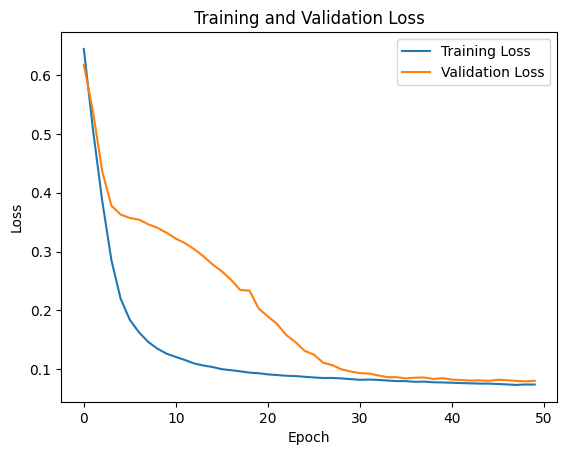

In [7]:
# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Vẽ biểu đồ loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 [==============================] - 3s 470ms/step

Kết quả đánh giá mô hình trên tập test:
Precision: 0.8953 (±0.0283)
Recall: 0.8292 (±0.0309)
F1-Score: 0.8609 (±0.0282)


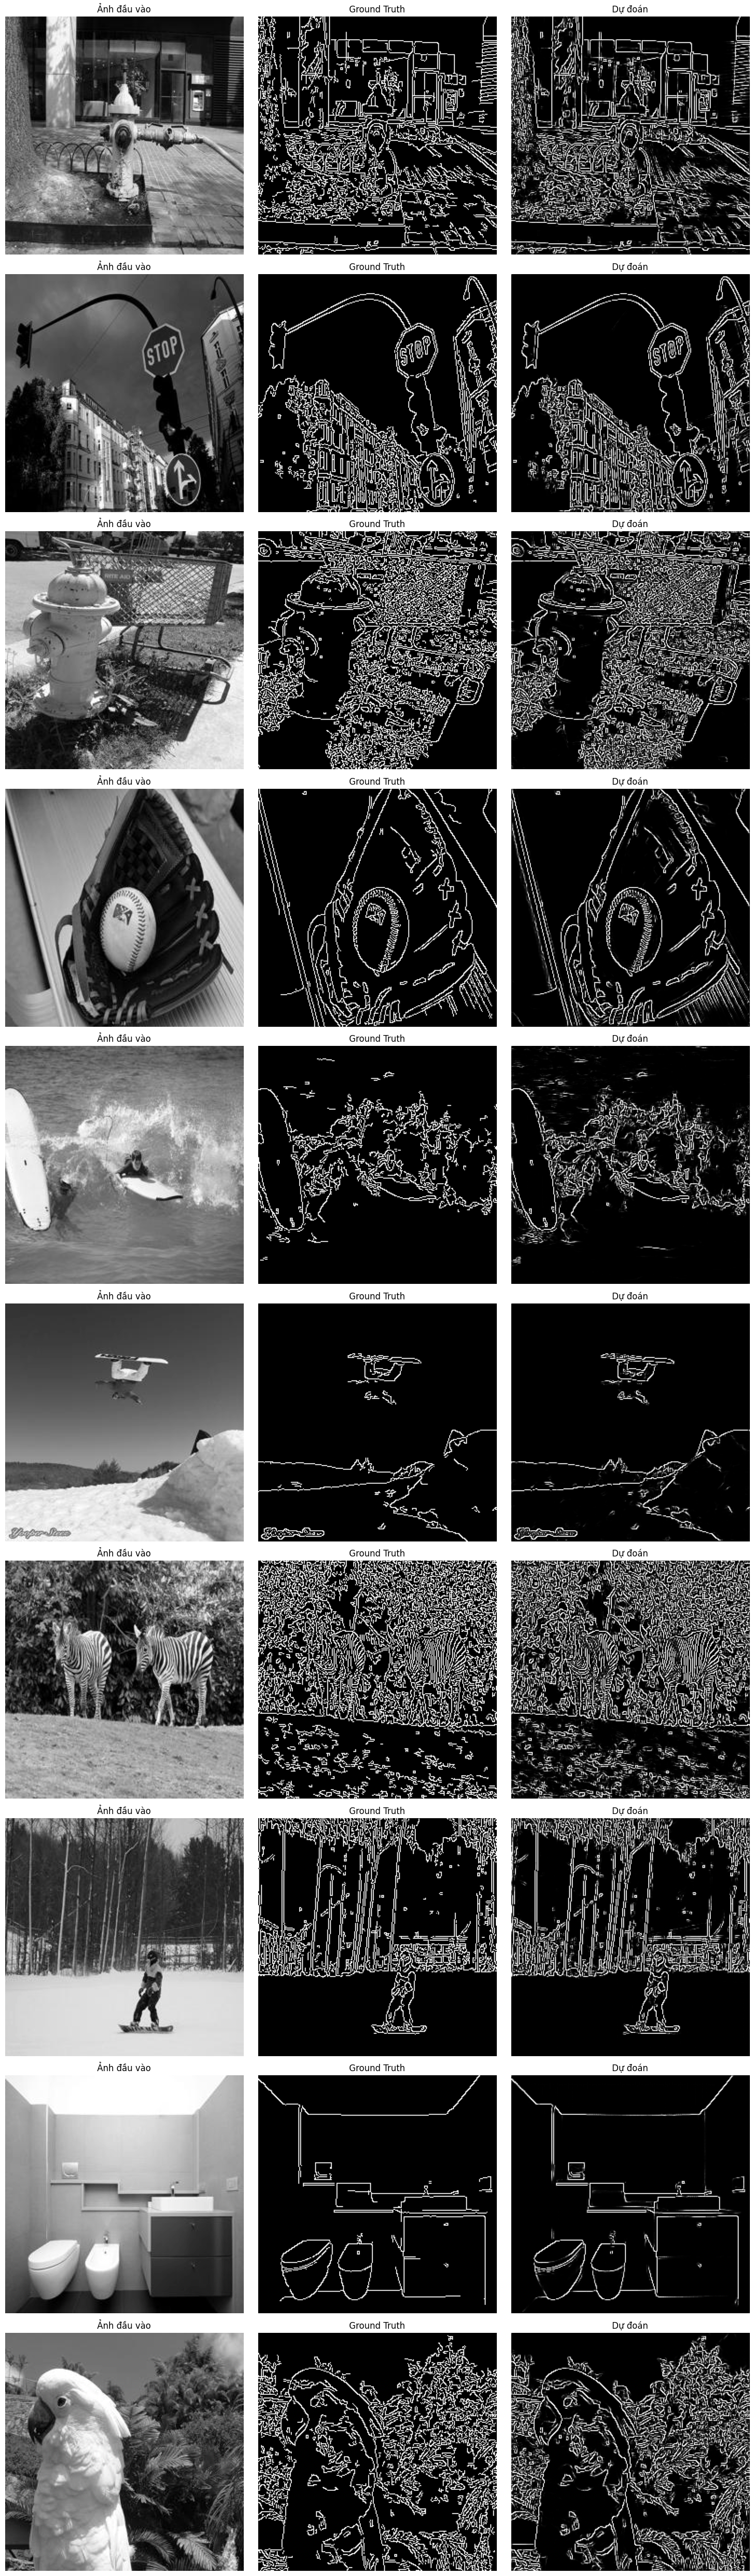

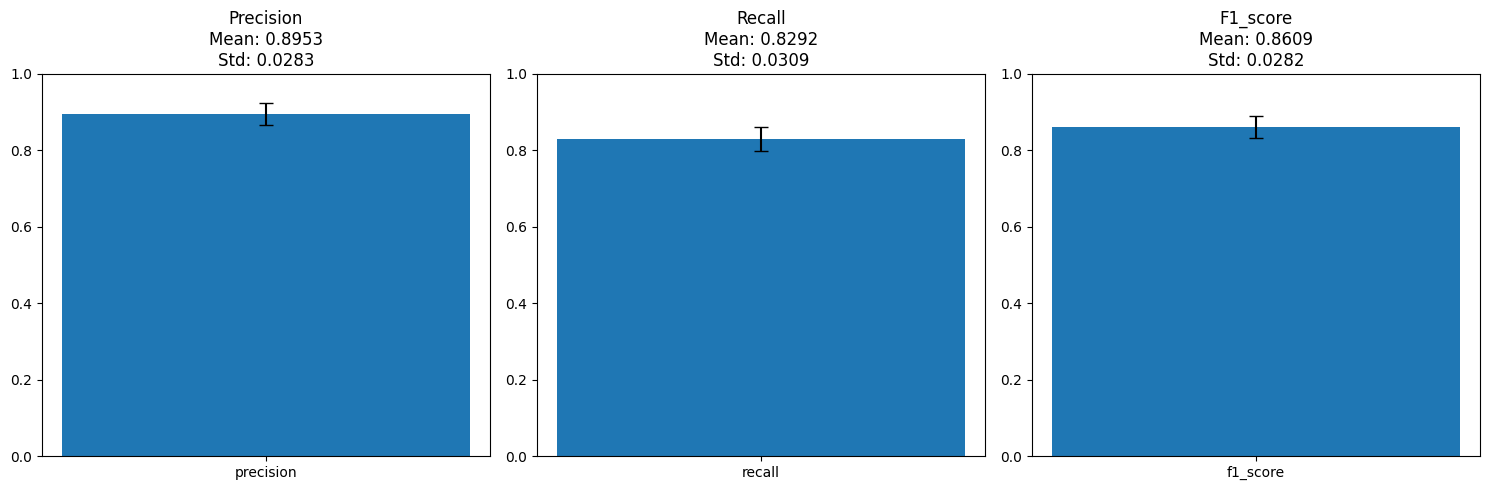

In [8]:
from sklearn.metrics import precision_recall_fscore_support

def evaluate_edge_detection_batch(model, X_test, y_test, threshold=0.5):
    """
    Đánh giá mô hình phát hiện cạnh trên tập test
    
    Parameters:
    -----------
    model : Model object
        Mô hình đã được huấn luyện
    X_test : numpy array
        Tập dữ liệu test
    y_test : numpy array
        Ground truth (nhãn thực tế)
    threshold : float
        Ngưỡng để chuyển đổi xác suất thành nhãn nhị phân
    """
    # Dự đoán trên tập test
    y_pred = model.predict(X_test)
    
    # Tính toán metrics cho từng ảnh
    precisions = []
    recalls = []
    f1_scores = []
    
    for i in range(len(X_test)):
        pred_binary = (y_pred[i] > threshold).astype(np.uint8)
        true_binary = (y_test[i] > 0).astype(np.uint8)
        
        precision, recall, f1, _ = precision_recall_fscore_support(
            true_binary.reshape(-1),
            pred_binary.reshape(-1),
            average='binary'
        )
        
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
    
    # Tính trung bình các metrics
    results = {
        'precision': np.mean(precisions),
        'recall': np.mean(recalls),
        'f1_score': np.mean(f1_scores),
        'precision_std': np.std(precisions),
        'recall_std': np.std(recalls),
        'f1_score_std': np.std(f1_scores),
        'predictions': y_pred
    }
    
    return results

def visualize_test_predictions(X_test, y_test, predictions, num_samples=10):
    """
    Hiển thị kết quả dự đoán từ tập test
    """
    # Chọn ngẫu nhiên các mẫu
    indices = np.random.choice(len(X_test), num_samples, replace=False)
    
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, 5*num_samples))
    
    for i, idx in enumerate(indices):
        # Ảnh gốc
        axes[i, 0].imshow(X_test[idx].squeeze(), cmap='gray')
        axes[i, 0].set_title('Ảnh đầu vào')
        axes[i, 0].axis('off')
        
        # Ground truth
        axes[i, 1].imshow(y_test[idx].squeeze(), cmap='gray')
        axes[i, 1].set_title('Ground Truth')
        axes[i, 1].axis('off')
        
        # Dự đoán
        axes[i, 2].imshow(predictions[idx].squeeze(), cmap='gray')
        axes[i, 2].set_title('Dự đoán')
        axes[i, 2].axis('off')
    
    plt.tight_layout()
    plt.show()

def plot_score_distribution(results):
    """
    Vẽ biểu đồ phân phối các metric
    """
    plt.figure(figsize=(15, 5))
    
    metrics = ['precision', 'recall', 'f1_score']
    for i, metric in enumerate(metrics, 1):
        plt.subplot(1, 3, i)
        mean = results[metric]
        std = results[f'{metric}_std']
        
        plt.bar([metric], [mean], yerr=[std], capsize=5)
        plt.title(f'{metric.capitalize()}\nMean: {mean:.4f}\nStd: {std:.4f}')
        plt.ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

# Chuẩn bị tập test
X_test = []
y_test = []
for img_path in list_of_image_paths[1000:1200]:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(img.astype(np.uint8), 100, 200)
    img_processed = preprocess_image(img)
    X_test.append(img_processed)
    y_test.append(edges)

X_test = np.array(X_test)
y_test = np.array(y_test)

# Đánh giá mô hình
results = evaluate_edge_detection_batch(model, X_test, y_test)

# In kết quả
print("\nKết quả đánh giá mô hình trên tập test:")
print(f"Precision: {results['precision']:.4f} (±{results['precision_std']:.4f})")
print(f"Recall: {results['recall']:.4f} (±{results['recall_std']:.4f})")
print(f"F1-Score: {results['f1_score']:.4f} (±{results['f1_score_std']:.4f})")

# Visualize kết quả
visualize_test_predictions(X_test, y_test, results['predictions'])

# Vẽ biểu đồ phân phối các metric
plot_score_distribution(results)

In [9]:
models.save_model(model, './models/278k-1000-epochs50-batchsize32.hdf5')

In [10]:
model1000 = models.load_model("./models/278k-1000-epochs10-batchsize32.hdf5")
model2000 = models.load_model("./models/278k-2000-epochs10-batchsize32.hdf5")

1/1 [==============================] - 0s 17ms/step


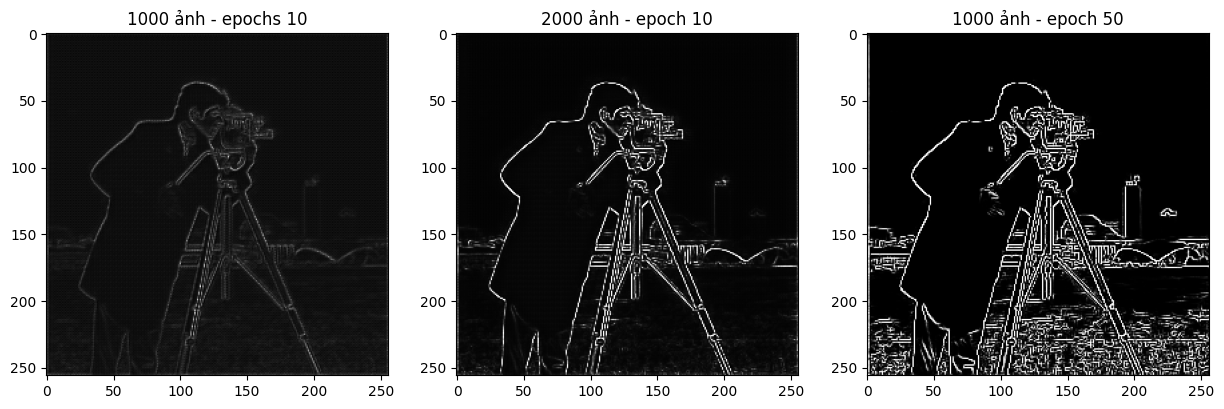

In [11]:
img_ptgr = cv2.imread('C:/Users/Administrator/Documents/GitHub/cnn-edge-detection/phtgph256.jpg', cv2.IMREAD_GRAYSCALE)

img_ptgr_processed = preprocess_image(img_ptgr)
img_ptgr_predicted_1000 = model1000.predict(np.expand_dims(img_ptgr_processed, axis=0))[0]
img_ptgr_predicted_2000 = model2000.predict(np.expand_dims(img_ptgr_processed, axis=0))[0]
img_ptgr_predicted = model.predict(np.expand_dims(img_ptgr_processed, axis=0))[0]

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.title('1000 ảnh - epochs 10')
plt.imshow(img_ptgr_predicted_1000, cmap='gray')
# plt.subplot(1, 4, 2)
# plt.imshow(traffic_img_gray, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('2000 ảnh - epoch 10')
plt.imshow(img_ptgr_predicted_2000, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('1000 ảnh - epoch 50')
plt.imshow(img_ptgr_predicted, cmap='gray')

1/1 [==============================] - 0s 20ms/step


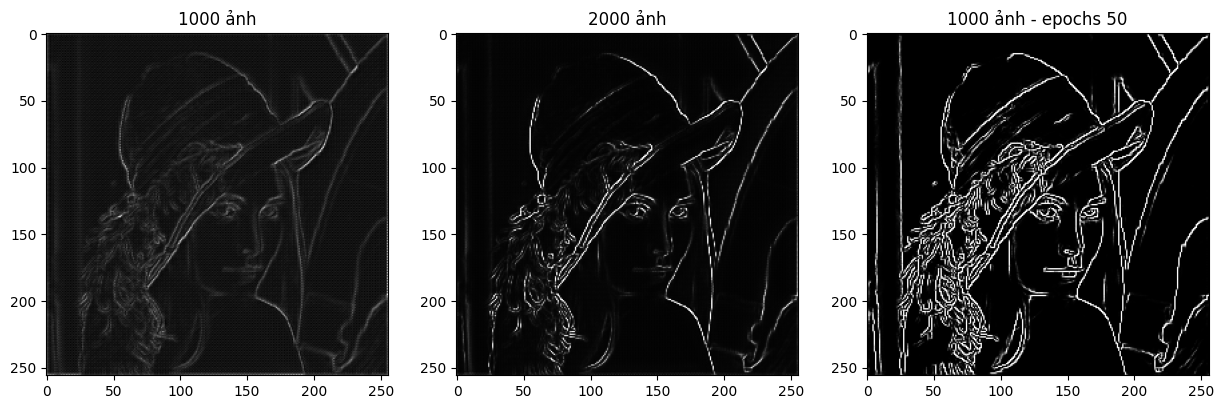

In [12]:
img_lena = cv2.imread('C:/Users/Administrator/Documents/GitHub/cnn-edge-detection/lena256.jpg', cv2.IMREAD_GRAYSCALE)

img_lena_processed = preprocess_image(img_lena)
img_lena_predicted_1000 = model1000.predict(np.expand_dims(img_lena_processed, axis=0))[0]
img_lena_predicted_2000 = model2000.predict(np.expand_dims(img_lena_processed, axis=0))[0]
img_lena_predicted = model.predict(np.expand_dims(img_lena_processed, axis=0))[0]

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.title('1000 ảnh')
plt.imshow(img_lena_predicted_1000, cmap='gray')
# plt.subplot(1, 4, 2)
# plt.imshow(traffic_img_gray, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('2000 ảnh')
plt.imshow(img_lena_predicted_2000, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('1000 ảnh - epochs 50')
plt.imshow(img_lena_predicted, cmap='gray')

1/1 [==============================] - 0s 28ms/step
Kết quả đánh giá:
Precision: 0.9117
Recall: 0.8385
F1-Score: 0.8735


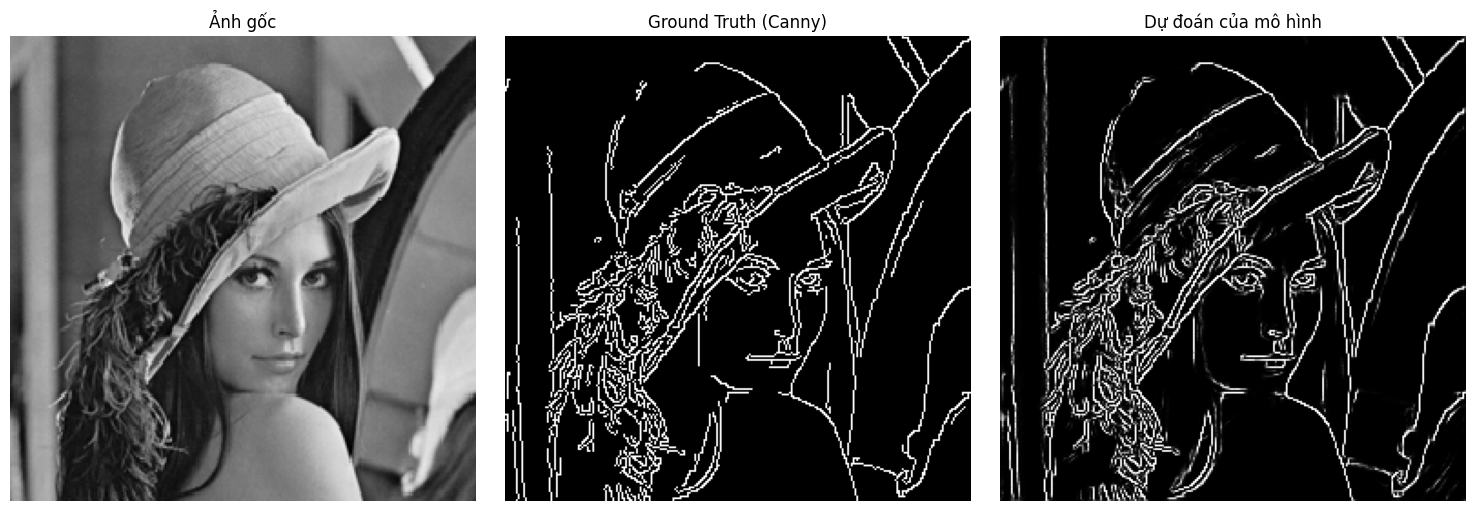

In [13]:
from sklearn.metrics import precision_recall_fscore_support

def evaluate_model_prediction(image_path, model, threshold=0.5):
    """
    Đánh giá F-Score cho ảnh dự đoán từ mô hình
    
    Parameters:
    -----------
    image_path : str
        Đường dẫn đến ảnh cần đánh giá
    model : Model object
        Mô hình đã được huấn luyện
    threshold : float
        Ngưỡng để chuyển đổi xác suất thành nhãn nhị phân
    """
    # Đọc và xử lý ảnh
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Tạo ground truth bằng Canny
    ground_truth = cv2.Canny(img, threshold1=100, threshold2=200)
    
    # Tiền xử lý ảnh cho mô hình
    img_processed = preprocess_image(img)
    
    # Dự đoán bằng mô hình
    prediction = model.predict(np.expand_dims(img_processed, axis=0))[0]
    
    # Chuyển đổi sang nhãn nhị phân
    pred_binary = (prediction > threshold).astype(np.uint8)
    gt_binary = (ground_truth > 0).astype(np.uint8)
    
    # Tính toán metrics
    precision, recall, f1, _ = precision_recall_fscore_support(
        gt_binary.reshape(-1),
        pred_binary.reshape(-1),
        average='binary'
    )
    
    # Hiển thị kết quả
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Ảnh gốc')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(ground_truth, cmap='gray')
    plt.title('Ground Truth (Canny)')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(prediction, cmap='gray')
    plt.title('Dự đoán của mô hình')
    plt.axis('off')
    
    plt.tight_layout()
    
    print(f"Kết quả đánh giá:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    return {
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'prediction': prediction,
        'ground_truth': ground_truth
    }

# Sử dụng hàm
image_path = 'C:\\Users\\Administrator\\Documents\\GitHub\\cnn-edge-detection\\lena256.jpg'
results = evaluate_model_prediction(image_path, model)